# Visualização dos resultados de treinamento

In [4]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision.models import resnet18, ResNet18_Weights
import dataset

import sys
sys.path.insert(0, '../')
from M07_segmentacao.models import EncoderDecoder

checkpoint = torch.load('../data/checkpoints/M08/checkpoint.pt', map_location='cpu')
checkpoint.keys()

dict_keys(['params', 'model', 'optim', 'sched', 'logger'])

In [6]:
ds_train, ds_valid = dataset.get_dataset('../data/oxford_pets')
encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=3)
model.classification = nn.Sequential(model.classification, nn.Sigmoid())
model.load_state_dict(checkpoint['model'])
model.eval();

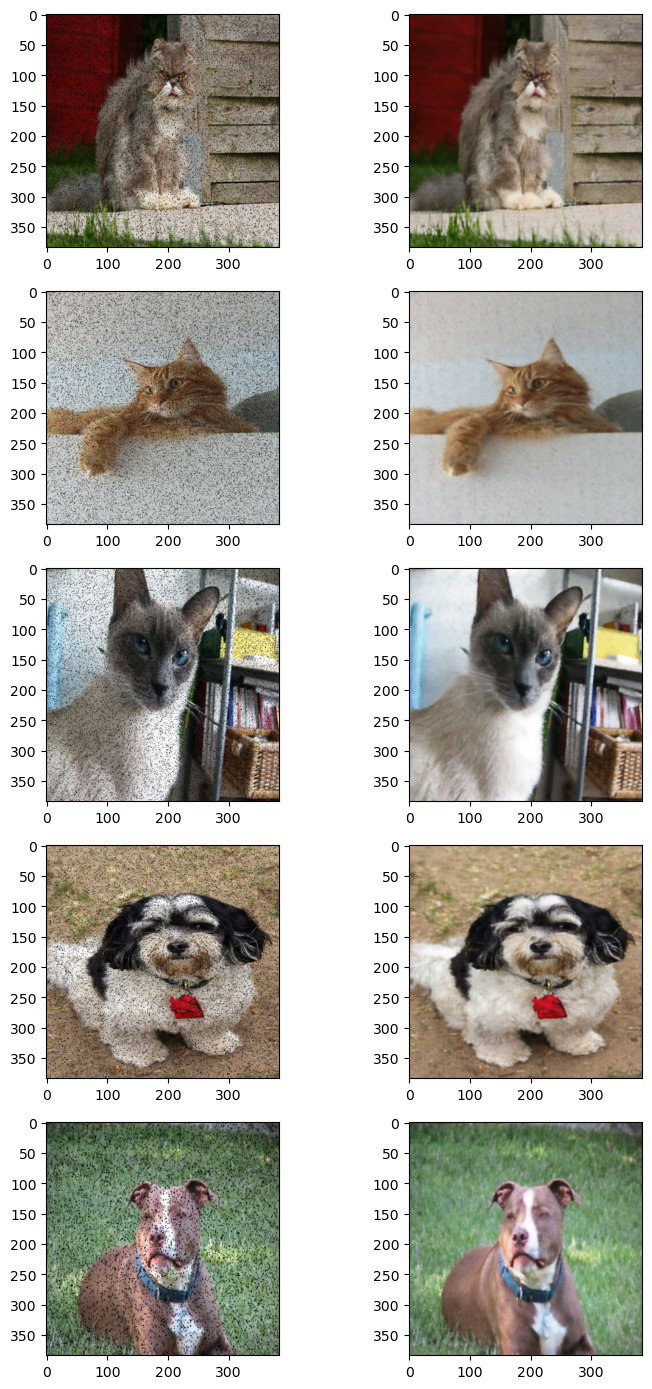

In [7]:
model.eval()
fig, axs = plt.subplots(5, 2, figsize=(8,14))
for idx in range(5):
    img, target = ds_valid[idx]
    with torch.no_grad():
        img_rec = model(img.unsqueeze(0))[0]
    
    axs[idx,0].imshow(img.permute(1, 2, 0))
    axs[idx,1].imshow(img_rec.permute(1, 2, 0))
plt.tight_layout()